In [1]:
from bs4 import BeautifulSoup
import os
import requests

import pandas as pd
import matplotlib.pyplot as plt

In [12]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
url = "https://www.transfermarkt.us/mohamed-salah/leistungsdatendetails/spieler/148455/saison//verein/0/liga/0/wettbewerb/GB1/pos/0/trainer_id/0"
response = requests.get(url,headers=headers)
response.text[:100] # Access the HTML with the text property
soup = BeautifulSoup(response.content, 'html.parser')

In [13]:
div = soup.findAll('div', class_='responsive-table')[1]

In [14]:
table = div.find('table')

In [ ]:
print(table.prettify())

In [16]:
            index=0 
            n_columns = 0
            n_rows=0
            column_names = []

In [17]:
            match=[]
            date=[]
            venue=[]
            forr=[]
            opp=[]
            result=[]
            pos=[]
            goal=[]
            assist=[]

            yellow=[]
            yellow2=[]
            red=[]
           
            play=[]

In [18]:
            # Find number of rows and columns
            # we also find the column titles if we can
            for row in table.find_all('tr'):
                
                # Determine the number of rows in the table
                td_tags = row.find_all('td')
                if len(td_tags) > 0:
                    n_rows+=1
                    if n_columns == 0:
                        # Set the number of columns for our table
                        n_columns = len(td_tags)
                        
                # Handle column names if we find them
                th_tags = row.find_all('th') 
                if len(th_tags) > 0 and len(column_names) == 0:
                    for th in th_tags:
                      try:
                         column_names.append( th.find('span')['title'] ) 
                      except: 
                       column_names.append(th.get_text())
    
            
            
    
            columns = column_names if len(column_names) > 0 else range(0,n_columns)
            df = pd.DataFrame(columns = columns,
                              index= range(0,n_rows))
            
            for row in table.find_all('tr'):
                
                columns = row.find_all('td')
                
                
                if len(columns) >=13: 

                   match.append(columns[0].get_text().strip())
                   date.append(columns[1].get_text().strip())
                   venue.append(columns[2].get_text().strip())
                   forr.append(columns[3].find('img', class_='tiny_wappen')['alt'].strip().split(' ')[0])
                   opp.append(columns[6].get_text().strip().split('(')[0])
                   result.append(columns[7].get_text().strip())
                   pos.append(columns[8].get_text().strip())
                   goal.append(columns[9].get_text().strip().split(' ')[0])
                   assist.append(columns[10].get_text().strip())
                   
                   yellow.append(columns[11].get_text().strip().split("'")[0])
                   yellow2.append(columns[12].get_text().strip().split("'")[0])
                   red.append(columns[13].get_text().strip().split("'")[0])
                   
                   play.append(columns[14].get_text().strip().split("'")[0])
                   

In [19]:
columns = column_names if len(column_names) > 0 else range(0,n_columns)
df = pd.DataFrame(columns = columns,
                              index= range(0,len(match)))


In [20]:
df['Matchday']=match
df['Assists']=assist

df['Date']=date
df['Red cards']=red
df['Yellow cards']=yellow
df['Minutes played']=play
df['Venue']=venue
df['For']=forr
df['Opponent']=opp
df['Goals']=goal
df['Pos.']=pos
df['Second yellow cards']=yellow2



df['Result']=result

In [21]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Matchday             125 non-null    object
 1   Date                 125 non-null    object
 2   Venue                125 non-null    object
 3   For                  125 non-null    object
 4   Opponent             125 non-null    object
 5   Result               125 non-null    object
 6   Pos.                 125 non-null    object
 7   Goals                125 non-null    object
 8   Assists              125 non-null    object
 9   Yellow cards         125 non-null    object
 10  Second yellow cards  125 non-null    object
 11  Red cards            125 non-null    object
 12  Minutes played       125 non-null    object
dtypes: object(13)
memory usage: 12.8+ KB


In [22]:
df['Yellow cards'].sum()


'21398190'

In [23]:
df.to_csv ('compactMO',index=False)

**Change Goals to int and get sum**

In [24]:
#df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)
df['Goals']=df['Goals'].replace([''],'0')
df['Goals']=df['Goals'].astype(int)
df['Goals'].sum()




80

Convert Date to datetime

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Matchday             125 non-null    object        
 1   Date                 125 non-null    datetime64[ns]
 2   Venue                125 non-null    object        
 3   For                  125 non-null    object        
 4   Opponent             125 non-null    object        
 5   Result               125 non-null    object        
 6   Pos.                 125 non-null    object        
 7   Goals                125 non-null    int64         
 8   Assists              125 non-null    object        
 9   Yellow cards         125 non-null    object        
 10  Second yellow cards  125 non-null    object        
 11  Red cards            125 non-null    object        
 12  Minutes played       125 non-null    object        
dtypes: datetime64[ns](1), int64(1), obj

Change Minute Played to int

In [27]:
df['Minutes played']=df['Minutes played'].replace([''],'0')
df['Minutes played']=df['Minutes played'].astype(int)

Change Matchday to int

In [28]:
df['Matchday']=df['Matchday'].replace([''],'0')
df['Matchday']=df['Matchday'].astype(int)

**Change assist to int and get sum**

In [29]:
df['Assists']=df['Assists'].replace([''],'0')
df['Assists']=df['Assists'].astype(int)
df['Assists'].sum()


33

Change Yellow cards to int


In [30]:
df['Yellow cards']=df['Yellow cards'].replace([''],'0')


In [31]:
df['Yellow cards']=df['Yellow cards'].astype(int)
df['Yellow cards'].values[df['Yellow cards'].values > 0] =1


df['Yellow cards'].sum()

4

In [32]:
df.head(20)


,Matchday,Date,Venue,For,Opponent,Result,Pos.,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
0,25,2014-02-08,H,Chelsea,Newcastle,3:0,RW,0,0,0,,,12
1,26,2014-02-11,A,Chelsea,West Brom,1:1,LW,0,0,0,,,1
2,31,2014-03-22,H,Chelsea,Arsenal,6:0,RW,1,0,0,,,23
3,32,2014-03-29,A,Chelsea,Crystal Palace,1:0,RW,0,0,0,,,34
4,33,2014-04-05,H,Chelsea,Stoke City,3:0,RW,1,2,0,,,90
5,34,2014-04-13,A,Chelsea,Swansea,0:1,RW,0,0,0,,,90
6,35,2014-04-19,H,Chelsea,Sunderland,1:2,RW,0,0,0,,,66
7,36,2014-04-27,A,Chelsea,Liverpool,0:2,RW,0,0,1,,,60
8,37,2014-05-04,H,Chelsea,Norwich,0:0,RW,0,0,0,,,45
9,38,2014-05-11,A,Chelsea,Cardiff,1:2,RW,0,0,0,,,79


Change second Yellow cards to int

In [33]:
df['Second yellow cards']=df['Second yellow cards'].replace([''],'0')
df['Second yellow cards']=df['Second yellow cards'].astype(int)
df['Second yellow cards'].values[df['Second yellow cards'].values > 0] =1

In [34]:
df.head()

,Matchday,Date,Venue,For,Opponent,Result,Pos.,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
0,25,2014-02-08,H,Chelsea,Newcastle,3:0,RW,0,0,0,0,,12
1,26,2014-02-11,A,Chelsea,West Brom,1:1,LW,0,0,0,0,,1
2,31,2014-03-22,H,Chelsea,Arsenal,6:0,RW,1,0,0,0,,23
3,32,2014-03-29,A,Chelsea,Crystal Palace,1:0,RW,0,0,0,0,,34
4,33,2014-04-05,H,Chelsea,Stoke City,3:0,RW,1,2,0,0,,90


Change Red Cards to int

In [35]:
df['Red cards']=df['Red cards'].replace([''],'0')
df['Red cards']=df['Red cards'].astype(int)
df['Red cards'].values[df['Red cards'].values > 0] =1

In [36]:
df.head()

,Matchday,Date,Venue,For,Opponent,Result,Pos.,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
0,25,2014-02-08,H,Chelsea,Newcastle,3:0,RW,0,0,0,0,0,12
1,26,2014-02-11,A,Chelsea,West Brom,1:1,LW,0,0,0,0,0,1
2,31,2014-03-22,H,Chelsea,Arsenal,6:0,RW,1,0,0,0,0,23
3,32,2014-03-29,A,Chelsea,Crystal Palace,1:0,RW,0,0,0,0,0,34
4,33,2014-04-05,H,Chelsea,Stoke City,3:0,RW,1,2,0,0,0,90


In [37]:
df['Pos.'].value_counts()

RW    102
CF     18
LW      2
AM      1
SS      1
        1
Name: Pos., dtype: int64


Change CF and SS and AM to ST.
Change ' ' to  RW




In [38]:
df['Pos.']=df['Pos.'].replace([''],'RW')
df['Pos.']=df['Pos.'].replace(['SS'],'ST')
df['Pos.']=df['Pos.'].replace(['AM'],'ST')
df['Pos.']=df['Pos.'].replace(['CF'],'ST')

In [39]:
df['Pos.'].value_counts()

RW    103
ST     20
LW      2
Name: Pos., dtype: int64

Salah goals

In [40]:
df.groupby(['Opponent']).sum().sort_values(['Goals'],ascending=False)



,Matchday,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
Opponent,,,,,,,
Bournemouth,139,8,1,0,0,0,521
Watford,118,8,2,0,0,0,532
Southampton,105,7,1,1,0,0,518
Arsenal,126,6,2,0,0,0,646
West Ham,110,6,2,0,0,0,534
Brighton,126,5,3,0,0,0,503
Crystal Palace,130,4,3,0,0,0,427
Spurs,124,4,1,0,0,0,553
Huddersfield,80,4,2,0,0,0,344





1.   Salah never scored vs swansea and Sunderland  and Liverpool(when he was with chelsea).
2.   Salah Scored mostly  on  Watford and Bournemouth with 8 goals









In [41]:
df[df['Venue'].values=='H'].groupby(['Venue','Opponent']).sum().sort_values(['Goals'],ascending=False)



Matchday  Goals  ...  Red cards  Minutes played
Venue Opponent                           ...                           
H     Watford                 76      6  ...          0             270
      Arsenal                 60      5  ...          0             383
      Southampton             43      5  ...          0             260
      Leeds                    1      3  ...          0              90
      Bournemouth             89      3  ...          0             270
      West Ham                56      3  ...          0             264
      Spurs                   68      3  ...          0             265
      Crystal Palace          56      3  ...          0             209
      Newcastle               78      3  ...          0             282
      Leicester               53      2  ...          0             263
      Man City                43      2  ...          0             265
      Huddersfield            46      2  ...          0             171
      Chelsea                 84      2  ...          0             259
      Brighton                55      2  ...          0             243
      Fulham                  12      1  ...          0              90
      Man Utd                 48      1  ...          0             258
      Everton                 30      1  ...          0             142
      Norwich                 38      1  ...          0             135
      Sheff Utd               21      1  ...          0              90
      Cardiff                 10      1  ...          0              90
      Stoke City              69      1  ...          0             180
      Burnley                 70      1  ...          0             270
      Aston Villa             33      0  ...          0              90
      Sunderland              35      0  ...          0              66
      Swansea                 24      0  ...          0              76
      West Brom               17      0  ...          0              90
      Wolves                  58      0  ...          0             180

[27 rows x 7 columns]

In [42]:
df[df['Venue'].values=='A'].groupby(['Venue','Opponent']).sum().sort_values(['Goals'],ascending=False)

Matchday  Goals  ...  Red cards  Minutes played
Venue Opponent                           ...                           
A     Bournemouth             50      5  ...          0             251
      Brighton                71      3  ...          0             260
      West Ham                54      3  ...          0             270
      Aston Villa             15      2  ...          0             155
      Watford                 42      2  ...          0             262
      Stoke City              14      2  ...          0              23
      Southampton             62      2  ...          0             258
      Huddersfield            34      2  ...          0             173
      Arsenal                 66      1  ...          0             263
      West Brom               61      1  ...          0              85
      Spurs                   56      1  ...          0             288
      Newcastle               82      1  ...          0             183
      Wolves                  42      1  ...          0             175
      Leicester               29      1  ...          0             231
      Crystal Palace          74      1  ...          0             218
      Liverpool               36      0  ...          0              60
      Man Utd                 57      0  ...          0             169
      Norwich                 26      0  ...          0              90
      Sheff Utd                7      0  ...          0              90
      Fulham                  31      0  ...          0              90
      Everton                 29      0  ...          0              90
      Swansea                 58      0  ...          0             180
      Chelsea                 52      0  ...          0             336
      Cardiff                 73      0  ...          0             169
      Burnley                 19      0  ...          0             114
      Man City                57      0  ...          0             225

[26 rows x 7 columns]

We can see that on Anfield Salah scored  5 goals Bournemouth
In away goals salah scored 6 goals on Watford.


In [43]:
df.groupby(['Matchday']).sum().sort_values(['Goals'],ascending=False)

,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
Matchday,,,,,,
1,6,2,0,0,0,353
31,6,2,0,0,0,293
16,5,1,0,0,0,247
12,4,0,0,0,0,257
23,4,1,1,0,0,268
34,4,1,0,0,0,360
3,4,1,0,0,0,360
18,3,2,0,0,0,251
26,3,0,0,0,0,271


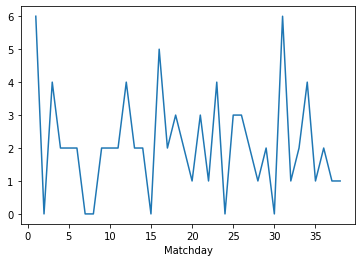

In [44]:
dfmatch=df.groupby(['Matchday'])['Goals'].sum()
dfmatch.plot(x ='Matchday', y='Goals', kind = 'line')
plt.show()


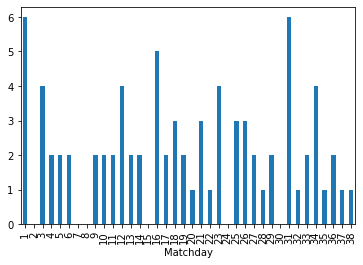

In [45]:
dfmatch.plot(x ='Matchday', y='Goals', kind = 'bar')
plt.show()

Salah never scored in round  15,30,2,7,8,24.

> Indented block


Salah Most scored @ round 1 and 31

In [46]:
df.groupby(df['Date'].dt.strftime('%B')).sum().sort_values(['Goals'],ascending=False)

,Matchday,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
Date,,,,,,,
December,317,14,8,0,0,0,1438
November,123,10,0,0,0,0,770
February,344,8,2,0,0,0,988
January,290,8,3,1,0,0,1084
March,336,8,1,0,0,0,867
April,381,7,4,2,0,0,930
August,22,7,6,0,0,0,821
September,65,7,1,0,0,0,1090
October,91,6,3,0,0,0,872


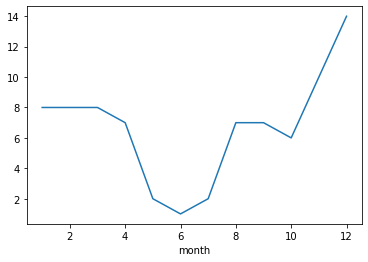

In [47]:

df['month'] = pd.DatetimeIndex(df['Date']).month
df2=df.groupby(df['month'])['Goals'].sum()
df2.plot(x ='month', y='Goals', kind = 'line')
plt.show()


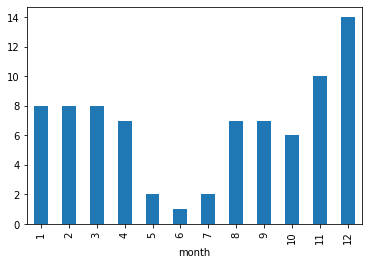

In [48]:
df2.plot(x ='month', y='Goals', kind = 'bar')
plt.show()

Salah scored in all months and mainly and December and November

In [49]:
df.groupby(df['Date'].dt.strftime('%d')).sum().sort_values(['Goals'],ascending=False)

,Matchday,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played,month
Date,,,,,,,,
04,140,7,0,0,0,0,478,35
12,63,6,1,0,0,0,443,31
24,129,6,2,0,0,0,522,31
14,121,6,1,0,0,0,526,40
08,75,5,1,0,0,0,192,21
17,82,5,1,0,0,0,330,26
22,132,4,2,0,0,0,552,51
29,139,4,2,0,0,0,483,50
27,87,3,3,1,0,0,415,34


Salah never scored on  day 15,28,6

Minutes/goal for liverpool


In [50]:
#df['Second yellow cards'].values[df['Second yellow cards'].values > 0] =1
df['Minutes played'].values[df['For']=='Liverpool'].sum()/df['Goals'].values[df['For']=='Liverpool'].sum()






120.88461538461539

Minutes/goal

In [51]:
df['Minutes played'].sum()/df['Goals'].sum()

124.4875

In [52]:
df.to_csv ('compactMO',index=False)

In [53]:
df.groupby(['Matchday']).sum().sort_values(['Matchday'])

,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played,month
Matchday,,,,,,,
1,6,2,0,0,0,353,33
2,0,2,0,0,0,288,33
3,4,1,0,0,0,360,33
4,2,1,0,0,0,304,45
5,2,0,0,0,0,270,27
6,2,1,0,0,0,270,27
7,0,0,0,0,0,240,28
8,0,0,0,0,0,262,40
9,2,0,0,0,0,180,20


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Matchday             125 non-null    int64         
 1   Date                 125 non-null    datetime64[ns]
 2   Venue                125 non-null    object        
 3   For                  125 non-null    object        
 4   Opponent             125 non-null    object        
 5   Result               125 non-null    object        
 6   Pos.                 125 non-null    object        
 7   Goals                125 non-null    int64         
 8   Assists              125 non-null    int64         
 9   Yellow cards         125 non-null    int64         
 10  Second yellow cards  125 non-null    int64         
 11  Red cards            125 non-null    int64         
 12  Minutes played       125 non-null    int64         
 13  month                125 non-null  